<a href="https://colab.research.google.com/github/PochampellyDeekshitha/MachineLearning/blob/main/ML_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data =pd.read_csv('airlines_flights_data.csv')
data.shape

(300153, 12)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
    data.drop(labels=["price"],axis=1),
    data['price'],
    test_size=0.3,
    random_state=0)

In [ ]:
x_train.shape, x_test.shape

((210107, 11), (90046, 11))

In [ ]:
x_train_numeric['stops'] = pd.to_numeric(x_train_numeric['stops'], errors='coerce')
corr_features = correlation(x_train_numeric, 0.8)
print('correlated features: ', len(set(corr_features)))

correlated features:  0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, chi2, f_classif, f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import roc_auc_score, mean_squared_error
from scipy.stats import fisher_exact

X = pd.DataFrame({
    'f1': np.random.randint(0, 10, 100),
    'f2': np.random.randn(100),
    'f3': np.random.randint(0, 2, 100)
})
y_class = np.random.randint(0, 2, 100)
y_reg = np.random.randn(100)

corr = X.corrwith(pd.Series(y_reg))

mi_class = mutual_info_classif(X, y_class)
mi_reg = mutual_info_regression(X, y_reg)

chi2_vals, _ = chi2(X[['f1','f3']], y_class)

table = np.array([[10, 5], [3, 20]])
fisher_p = fisher_exact(table)[1]

anova_class, _ = f_classif(X, y_class)
anova_reg, _ = f_regression(X, y_reg)

roc_auc_scores = [roc_auc_score(y_class, X[col]) for col in X.columns]

mse_scores = [mean_squared_error(y_reg, X[col]) for col in X.columns]

print("Correlation:", corr)
print("Mutual_c:", mi_class)
print("Mutual_r:", mi_reg)
print("Chi2:", chi2_vals)
print("Fisher p-value:", fisher_p)
print("ANOVA Class:", anova_class)
print("ANOVA Reg:", anova_reg)
print("ROC-AUC Scores:", roc_auc_scores)
print("MSE Scores:", mse_scores)


Correlation: f1    0.072233
f2   -0.041426
f3   -0.082250
dtype: float64
Mutual Info (Class): [0 0 0]
Mutual Info (Reg): [0.         0.         0.01457429]
Chi2: [0.55378916 0.01494611]
Fisher p-value: 0.0012591609575874861
ANOVA Class: [0.31149192 0.78756173 0.03052449]
ANOVA Reg: [0.51400743 0.16847035 0.66749309]
ROC-AUC Scores: [np.float64(0.5383380168606985), np.float64(0.4632677639502208), np.float64(0.4911682055399438)]
MSE Scores: [33.3413384328084, 1.986666352105309, 1.5111982468972283]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

X = pd.DataFrame(np.random.randn(100,5), columns=[f'f{i}' for i in range(1,6)])
y = np.random.randn(100)

model = LinearRegression()
fs = SequentialFeatureSelector(model, n_features_to_select=3, direction='forward')
fs.fit(X,y)
print("Forward:", X.columns[fs.get_support()])

Forward: Index(['f1', 'f2', 'f3'], dtype='object')


In [ ]:
bs = SequentialFeatureSelector(model, n_features_to_select=3, direction='backward')
bs.fit(X,y)
print("Backward:", X.columns[bs.get_support()])

Backward: Index(['f1', 'f2', 'f3'], dtype='object')


In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
es = ExhaustiveFeatureSelector(model, min_features=1, max_features=3, scoring='r2', cv=5)
es.fit(X,y)
print("Exhaustive:", es.best_feature_names_)

Features: 25/25

Exhaustive: ('f1', 'f2')


In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X,y)
print("RFE Ranking:", rfe.ranking_)
print("RFE Support:", X.columns[rfe.get_support()])

RFE Ranking: [1 1 1 2 3]
RFE Support: Index(['f1', 'f2', 'f3'], dtype='object')


**STATISTICAL** **METHODS**

In [ ]:
import pandas as pd
df = pd.read_csv("airlines_flights_data.csv")
df = df[['airline','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left','price']]
df_encoded = pd.get_dummies(df, drop_first=True)
X_reg = df_encoded.drop('price', axis=1)
y_reg = df_encoded['price']
X_clf = df_encoded.drop('class_Economy', axis=1)  # target is class (Business=1, Economy=0)
y_clf = df_encoded['class_Economy']


In [ ]:
corr = X_reg.corrwith(y_reg)
print("Correlation:\n", corr)

Correlation:
 duration                        0.204222
days_left                      -0.091949
airline_Air_India               0.070041
airline_GO_FIRST               -0.194179
airline_Indigo                 -0.280882
airline_SpiceJet               -0.114019
airline_Vistara                 0.360816
source_city_Chennai             0.018742
source_city_Delhi              -0.043282
source_city_Hyderabad          -0.012828
source_city_Kolkata             0.016127
source_city_Mumbai              0.013206
departure_time_Early_Morning   -0.012232
departure_time_Evening          0.007946
departure_time_Late_Night      -0.033768
departure_time_Morning          0.018199
departure_time_Night            0.041768
stops_two_or_more              -0.064248
stops_zero                     -0.187277
arrival_time_Early_Morning     -0.060449
arrival_time_Evening            0.056408
arrival_time_Late_Night        -0.093602
arrival_time_Morning            0.030379
arrival_time_Night              0.020344
de

In [ ]:
# Mutual Information
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
mi_reg = mutual_info_regression(X_reg, y_reg)
mi_class = mutual_info_classif(X_clf, y_clf)
print("Mutual Info (Regression):", mi_reg)
print("Mutual Info (Classification):", mi_class)


Mutual Info (Regression): [2.41749362 0.47804025 0.40347781 0.20204738 0.29030074 0.08347685
 0.51561261 0.32562692 0.43128561 0.34844171 0.36066466 0.42953415
 0.08803891 0.10695533 0.01112843 0.09398076 0.08134042 0.10888133
 0.28953351 0.0817789  0.12511344 0.06976828 0.0993671  0.10558901
 0.30054352 0.38943223 0.32121807 0.34027094 0.38124345 0.61995032]
Mutual Info (Classification): [2.89683657e-02 1.10491892e-03 6.18114961e-01 1.55817072e-02
 3.22589745e-02 6.37879006e-02 1.08419072e-02 6.40976309e-02
 2.59590187e-03 3.03113132e-03 2.74758405e-03 3.33165784e-03
 4.42508261e-03 5.30301892e-03 5.27784107e-03 9.88534992e-06
 6.40033275e-03 4.34524507e-03 9.28448076e-03 4.83754318e-03
 1.41142564e-03 6.43471708e-03 4.97417420e-03 4.15333758e-03
 9.22746371e-03 2.74364860e-03 3.51039877e-03 2.95954542e-03
 1.52963328e-03 4.27416006e-03]


In [ ]:
# Chi-Square Test
from sklearn.feature_selection import chi2
chi2_vals, _ = chi2(X_clf, y_clf)
print("Chi-Square:", chi2_vals)

Chi-Square: [2.44426276e+04 3.60854990e+02 6.51107154e+09 3.42043236e+03
 1.04824899e+04 1.95056731e+04 4.07619713e+03 1.57259547e+04
 2.72228961e+01 4.74609882e+01 2.93928983e+00 9.31954972e+01
 6.07979475e+01 3.42794691e+01 2.73591472e+01 2.57924139e+02
 1.79622468e+00 6.18207030e+02 3.27586965e+03 1.25425094e+03
 5.01642651e+02 2.39135268e+02 2.12812135e+03 3.75043148e+02
 1.34668729e+01 3.95043579e+01 1.09125245e+02 1.47291052e+01
 4.22685604e+01 2.69460552e+01]


In [ ]:
# Fisher's Exact Test
from scipy.stats import fisher_exact
import numpy as np
table = pd.crosstab(df['stops'], df['class']).iloc[:2,:2].values
fisher_p = fisher_exact(table)[1]
print("Fisher p-value:", fisher_p)


Fisher p-value: 0.0


In [ ]:
# ANOVA
from sklearn.feature_selection import f_classif, f_regression
anova_reg, _ = f_regression(X_reg, y_reg)
anova_class, _ = f_classif(X_clf, y_clf)
print("ANOVA Regression:", anova_reg)
print("ANOVA Classification:", anova_class)


ANOVA Regression: [1.30631523e+04 2.55927387e+03 1.47972626e+03 1.17608031e+04
 2.57086106e+04 3.95342878e+03 4.49248363e+04 1.05463763e+02
 5.63324917e+02 4.93997454e+01 7.80797855e+01 5.23575341e+01
 4.49186821e+01 1.89524907e+01 3.42656044e+02 9.94429190e+01
 5.24548917e+02 1.24410978e+03 1.09097198e+04 1.10081421e+03
 9.58089677e+02 2.65296503e+03 2.77267463e+02 1.24279094e+02
 1.02460110e+02 8.30433650e+02 2.06407506e+01 1.31867901e+02
 3.33065148e+01 2.19242459e+06]
ANOVA Classification: [5.88833291e+03 5.10357071e+01 2.19242459e+06 4.75650247e+03
 1.18062259e+04 2.46483104e+04 4.26200068e+03 3.01476654e+04
 3.12554469e+01 5.96637275e+01 3.40177747e+00 1.10253488e+02
 7.62911977e+01 4.40966586e+01 3.49406356e+01 2.59273345e+02
 2.35426367e+00 7.37737003e+02 3.46715904e+03 1.43199769e+03
 5.29733790e+02 3.23915383e+02 2.24895792e+03 4.74891039e+02
 1.93771124e+01 4.56495790e+01 1.34965916e+02 1.71746111e+01
 5.06310008e+01 3.35556452e+01]


In [ ]:
# ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc_scores = [roc_auc_score(y_clf, X_clf[col]) for col in X_clf.columns]
print("ROC-AUC Scores:", roc_auc_scores)


ROC-AUC Scores: [np.float64(0.3979693838910082), np.float64(0.508176792518463), np.float64(0.00032269373377319795), np.float64(0.4401652934229871), np.float64(0.5560638905286791), np.float64(0.6043229171707005), np.float64(0.5218008767770219), np.float64(0.3387001222719022), np.float64(0.496307822929303), np.float64(0.5061377722537208), np.float64(0.49875421500851413), np.float64(0.5074759804073838), np.float64(0.49307852399115604), np.float64(0.5054429286474218), np.float64(0.4951992585287201), np.float64(0.5020877450332759), np.float64(0.49871407556519953), np.float64(0.4804018394165813), np.float64(0.5237312331440871), np.float64(0.5241728284576125), np.float64(0.5100036166131812), np.float64(0.4844322320859544), np.float64(0.5196353025501055), np.float64(0.4825516065905332), np.float64(0.49600612962143914), np.float64(0.4954574366154541), np.float64(0.5089996798969487), np.float64(0.49714639290799567), np.float64(0.5052049948500466), np.float64(0.4954606863618845)]


WRAPPER METHODS

In [ ]:
# Forward Selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
model = LinearRegression()
fs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
fs.fit(X_reg, y_reg)
print("Forward Selected:", X_reg.columns[fs.get_support()])


Forward Selected: Index(['duration', 'days_left', 'departure_time_Morning', 'stops_two_or_more',
       'class_Economy'],
      dtype='object')


In [ ]:
# Backward Selection
bs = SequentialFeatureSelector(model, n_features_to_select=5, direction='backward')
bs.fit(X_reg, y_reg)
print("Backward Selected:", X_reg.columns[bs.get_support()])


Backward Selected: Index(['days_left', 'airline_GO_FIRST', 'airline_Indigo', 'stops_two_or_more',
       'class_Economy'],
      dtype='object')


EMBEDDED METHODS

In [ ]:
# LASSO (L1 Regularization)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_reg, y_reg)
print("LASSO Coefficients:", dict(zip(X_reg.columns, lasso.coef_)))


LASSO Coefficients: {'duration': np.float64(42.583626871694406), 'days_left': np.float64(-130.95207631024317), 'airline_Air_India': np.float64(115.24093223396547), 'airline_GO_FIRST': np.float64(1704.4960052352433), 'airline_Indigo': np.float64(2106.0244367564146), 'airline_SpiceJet': np.float64(2292.7089238979843), 'airline_Vistara': np.float64(4070.393250284076), 'source_city_Chennai': np.float64(-67.17815590188974), 'source_city_Delhi': np.float64(-1405.668948437958), 'source_city_Hyderabad': np.float64(-1678.7461356133651), 'source_city_Kolkata': np.float64(1583.8292154389019), 'source_city_Mumbai': np.float64(-211.57837240515042), 'departure_time_Early_Morning': np.float64(835.2744883855188), 'departure_time_Evening': np.float64(733.4235694046199), 'departure_time_Late_Night': np.float64(1691.7416104937527), 'departure_time_Morning': np.float64(855.9580431431997), 'departure_time_Night': np.float64(689.6538527317728), 'stops_two_or_more': np.float64(2104.9433812528973), 'stops_zer

In [ ]:
# Ridge (L2 Regularization)
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_reg, y_reg)
print("Ridge Coefficients:", dict(zip(X_reg.columns, ridge.coef_)))


Ridge Coefficients: {'duration': np.float64(42.58332504120061), 'days_left': np.float64(-130.95201423845856), 'airline_Air_India': np.float64(115.99323660009678), 'airline_GO_FIRST': np.float64(1704.9030224421956), 'airline_Indigo': np.float64(2106.386312196013), 'airline_SpiceJet': np.float64(2293.1133940156246), 'airline_Vistara': np.float64(4071.1375348848987), 'source_city_Chennai': np.float64(-67.4342457377222), 'source_city_Delhi': np.float64(-1405.860541846768), 'source_city_Hyderabad': np.float64(-1678.9671239827846), 'source_city_Kolkata': np.float64(1583.7014996244839), 'source_city_Mumbai': np.float64(-211.8268691008215), 'departure_time_Early_Morning': np.float64(835.5442254235725), 'departure_time_Evening': np.float64(733.662272689452), 'departure_time_Late_Night': np.float64(1692.981992943208), 'departure_time_Morning': np.float64(856.2025632658356), 'departure_time_Night': np.float64(689.9664789686012), 'stops_two_or_more': np.float64(2104.8449083611727), 'stops_zero': n

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

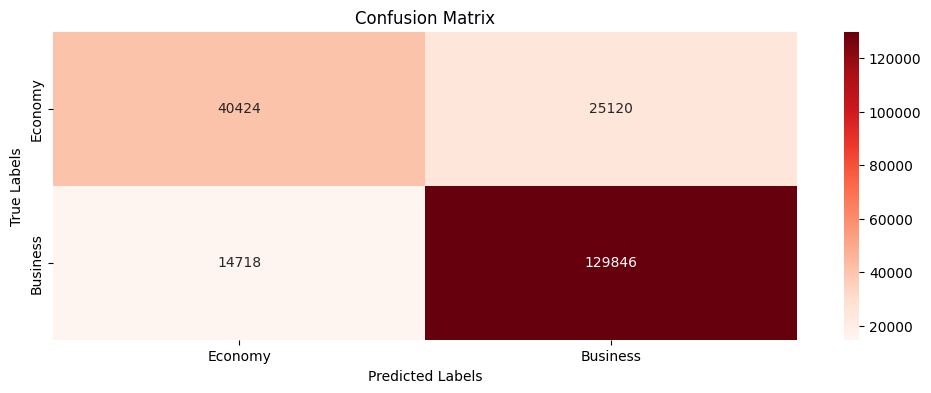

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clf)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_clf, test_size=0.7, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Economy', 'Business'],
            yticklabels=['Economy', 'Business'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import numpy
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52,3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X,y)          #train X and target y
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)
log_odds = logr.coef_ * X + logr.intercept_
odds = numpy.exp(log_odds)
probability = odds / (1 + odds)
log_odds = logr.coef_
odds = numpy.exp(log_odds)
print(odds)

[0]
[[4.03557295]]


In [ ]:
import numpy
from sklearn import linear_model
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96,4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
logr = linear_model.LogisticRegression()
logr.fit(X,y)
def logit2prob(logr, X):
  log_odds = logr.coef_ * X + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)
print(logit2prob(logr, X))

[[0.60749168]
 [0.19267555]
 [0.12774788]
 [0.00955056]
 [0.08037781]
 [0.0734485 ]
 [0.88362857]
 [0.77901203]
 [0.88924534]
 [0.81293431]
 [0.57718238]
 [0.96664398]]


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv("House-Price.csv")
X = data[["sqft_living"]]
y = data["price"]
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
print("Slope:", slope)
print("Intercept:", intercept)
print("Price Prediction for 2000 sqft:", model.predict([[2000]])[0])


Slope: 251.95013105919193
Intercept: 12954.242396307876
Price Prediction for 2000 sqft: 516854.50451469177


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print("Slope:", slope)
print("Intercept:", intercept)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

Slope: 251.95013105919193
Intercept: 12954.242396307876
MSE: 258959628843.01614
MAE: 186030.31175957463
RMSE: 508880.7609283496


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [ ]:
df = pd.read_csv("Salary_Data.csv")
X = df[['YearsExperience']]
y = df['Salary']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])
print(f"For each extra year of experience, salary increases by {model.coef_[0]:.2f}")

Intercept (b0): 25792.200198668696
Slope (b1): 9449.962321455076
For each extra year of experience, salary increases by 9449.96


In [ ]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 31270951.722280964
MAE: 4644.2012894435375
RMSE: 5592.043608760661


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
data = {
    'Age': [2,4,7,13,15,19,21,23,25, 30, 35, 40, 45, 50, 55, 60],
    'Height': [50,60,75,90,105,115,130,152,160, 165, 170, 175, 180, 185, 190, 195],
    'Weight': [5,6,10,12,24,35,45,60,70, 72, 75, 78, 82, 85, 88, 90],
    'TimeOnExercise': [0,0,0,0,0,1,1,1,2, 3, 4, 5, 6, 7, 8, 9],
    'WeightReduction': [0,0,0,0,1,1,1,1,2, 3, 5, 6, 8, 10, 11, 13]
}

In [ ]:
df = pd.DataFrame(data)
print (df)

    Age  Height  Weight  TimeOnExercise  WeightReduction
0     2      50       5               0                0
1     4      60       6               0                0
2     7      75      10               0                0
3    13      90      12               0                0
4    15     105      24               0                1
5    19     115      35               1                1
6    21     130      45               1                1
7    23     152      60               1                1
8    25     160      70               2                2
9    30     165      72               3                3
10   35     170      75               4                5
11   40     175      78               5                6
12   45     180      82               6                8
13   50     185      85               7               10
14   55     190      88               8               11
15   60     195      90               9               13


In [ ]:
X = df[['Age', 'Height', 'Weight', 'TimeOnExercise']]
y = df['WeightReduction']
print(X)

    Age  Height  Weight  TimeOnExercise
0     2      50       5               0
1     4      60       6               0
2     7      75      10               0
3    13      90      12               0
4    15     105      24               0
5    19     115      35               1
6    21     130      45               1
7    23     152      60               1
8    25     160      70               2
9    30     165      72               3
10   35     170      75               4
11   40     175      78               5
12   45     180      82               6
13   50     185      85               7
14   55     190      88               8
15   60     195      90               9


In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      2
9      3
10     5
11     6
12     8
13    10
14    11
15    13
Name: WeightReduction, dtype: int64


In [ ]:
model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
for feature, coef in zip(X.columns, model.coef_):
    print(f"Each unit increase in {feature} changes Weight Reduction by {coef:.2f} units.")


Intercept: 1.9564651492167047
Coefficients: [ 0.20342653 -0.04842271  0.01273121  0.76816708]
Each unit increase in Age changes Weight Reduction by 0.20 units.
Each unit increase in Height changes Weight Reduction by -0.05 units.
Each unit increase in Weight changes Weight Reduction by 0.01 units.
Each unit increase in TimeOnExercise changes Weight Reduction by 0.77 units.
